In [29]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
from requests.exceptions import Timeout
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [19]:
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(
client_id = "e5a88b0785c240dca7066a1d28366730",
client_secret = "57d5493921a94eb0bc4ccb80156cbba5"))
playlist_id = "4rnleEAOdmFAbRcNCgZMpY"

In [25]:
def all_song_ids(playlist_id):
    
    playlist = sp.playlist_tracks(playlist_id)
    tracks = playlist['items']
    
    while sp.next(playlist):
        playlist = sp.next(playlist)
        tracks.extend(playlist['items'])

    song_ids = []
    
    for track in tracks:
        song_ids.append(track['track']['id'])
    
    return song_ids

In [26]:
len(all_song_ids(playlist_id))

5295

In [27]:
song_ids

['7dS5EaCoMnN7DzlpT6aRn2',
 '2V4bv1fNWfTcyRJKmej6Sj',
 '7KA4W4McWYRpgf0fWsJZWB',
 '3gbBpTdY8lnQwqxNCcf795',
 '3ZFTkvIE7kyPt6Nu3PEa7V',
 '7wMq5n8mYSKlQIGECKUgTX',
 '78W8wiUIlQ2SnWY9TVowKZ',
 '2jcPoPin36hyNRSi4ZsqeB',
 '2CEgGE6aESpnmtfiZwYlbV',
 '0tBRo4P60DgKmg4jt48upm',
 '1kAZhbcsXqfUjnVeqPywn2',
 '2N2QvMYwyYHE8V4KZbbG4i',
 '0ltBH1JNzSvQJPjJpvTu9B',
 '5HbCnVLXRyZVxnreOPgJCK',
 '4NFhtFE68cXUrfbne8JE2c',
 '5HE3z4Ew7wZ91l3ZOpGKa4',
 '5L9THbmMKB6ZlHlMgzaXHf',
 '7qUcqYzOtfZe65bednDxmz',
 '0seHreoI3kwp38OlEgLLnT',
 '5DcPOPPUnNhyPYbTi2aWjR',
 '3bidbhpOYeV4knp8AIu8Xn',
 '1HfPcQ3c2HyGeID3u1lmCa',
 '6Ep6BzIOB9tz3P4sWqiiAB',
 '3bC1ahPIYt1btJzSSEyyrF',
 '05SBRd4fXgn8FX7bf8BCAE',
 '3cHyrEgdyYRjgJKSOiOtcS',
 '2iJuuzV8P9Yz0VSurttIV5',
 '6g1NlCpW7fgqDnWbCCDrHl',
 '4YMqbFcDIFiCBd02PzUBcM',
 '5YPMEOJ58kfl56VHxTgwx3',
 '37sINbJZcFdHFAsVNsPq1i',
 '3zrYNl1aMdFrQkcOjKVr5u',
 '1QzFhzIOW7CyRJLpmq5CM0',
 '1R2SZUOGJqqBiLuvwKOT2Y',
 '4yOn1TEcfsKHUJCL2h1r8I',
 '3GBlLqIYgB8zWaeWDNJzdh',
 '43lwHSTEexXRVVeXZtAtfi',
 

In [30]:
audio_features = []

for song_id in song_ids:
    try:
        features = sp.audio_features(song_id)
        if features:
            audio_features.append(features[0])
    except Timeout:
        print("Timeout occurred while fetching audio features for song ID:", song_id)
    except requests.exceptions.RequestException as e:
        print("An error occurred while fetching audio features for song ID:", song_id)
        print("Error:", str(e))

for features in audio_features:
    print(features)

{'danceability': 0.566, 'energy': 0.664, 'key': 4, 'loudness': -5.303, 'mode': 0, 'speechiness': 0.0464, 'acousticness': 0.634, 'instrumentalness': 0, 'liveness': 0.116, 'valence': 0.437, 'tempo': 128.945, 'type': 'audio_features', 'id': '7dS5EaCoMnN7DzlpT6aRn2', 'uri': 'spotify:track:7dS5EaCoMnN7DzlpT6aRn2', 'track_href': 'https://api.spotify.com/v1/tracks/7dS5EaCoMnN7DzlpT6aRn2', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7dS5EaCoMnN7DzlpT6aRn2', 'duration_ms': 241688, 'time_signature': 4}
{'danceability': 0.768, 'energy': 0.82, 'key': 7, 'loudness': -4.63, 'mode': 0, 'speechiness': 0.0474, 'acousticness': 0.179, 'instrumentalness': 0, 'liveness': 0.689, 'valence': 0.625, 'tempo': 129.965, 'type': 'audio_features', 'id': '2V4bv1fNWfTcyRJKmej6Sj', 'uri': 'spotify:track:2V4bv1fNWfTcyRJKmej6Sj', 'track_href': 'https://api.spotify.com/v1/tracks/2V4bv1fNWfTcyRJKmej6Sj', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2V4bv1fNWfTcyRJKmej6Sj', 'duration_ms': 21329

In [44]:
X = pd.DataFrame(audio_features)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034,audio_features,4Zcz6saEkOII3PlXd9gN3o,spotify:track:4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,https://api.spotify.com/v1/audio-analysis/4Zcz...,215960,4
5291,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,audio_features,61KpQadow081I2AsbeLcsb,spotify:track:61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,https://api.spotify.com/v1/audio-analysis/61Kp...,215508,4
5292,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005,4
5293,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405,4


In [45]:
X = X.drop(['type', 'id', 'uri', 'track_href', 'analysis_url','time_signature'], axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945,241688
1,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,213293
2,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,180387
3,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435,214148
4,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024,218093
...,...,...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034,215960
5291,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,215508
5292,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008,156005
5293,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,178405


In [46]:
X_prep = StandardScaler().fit_transform(X)
pd.DataFrame(X_prep)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.719357,-0.206910,-0.345358,0.310316,-1.103751,-0.577340,2.379587,-0.209723,-0.503536,-0.346727,0.254327,0.663305
1,0.767132,0.725937,0.480103,0.597311,-1.103751,-0.567002,0.119894,-0.209723,3.543587,0.477929,0.292715,0.002159
2,-0.778228,-0.834788,0.204949,-1.360903,0.906002,-0.065622,1.073434,-0.209662,-0.552978,0.455996,-1.642029,-0.764021
3,0.112194,0.098059,1.030411,-0.150239,0.906002,-0.636265,-0.394124,-0.209723,0.591235,0.241059,0.197497,0.022067
4,0.840721,0.749856,1.305564,0.059143,-1.103751,-0.326133,0.641361,-0.209723,1.537683,1.061329,-0.834138,0.113922
...,...,...,...,...,...,...,...,...,...,...,...,...
5290,-0.402926,-0.117213,-1.445973,0.633558,0.906002,-0.734473,0.437741,-0.209723,0.082696,-0.127404,-0.005774,0.064257
5291,-1.653933,-0.529818,1.030411,-0.513993,0.906002,0.142166,2.175966,-0.209636,1.085648,-1.509141,2.216771,0.053733
5292,1.716425,-1.958988,-1.170820,0.431425,0.906002,2.747275,-0.320126,-0.209723,0.972639,-0.329182,-1.549821,-1.331729
5293,2.209469,-1.797534,1.580718,-1.258131,-1.103751,-0.235161,-0.761585,-0.209402,-0.609482,0.205968,-0.646411,-0.810170


In [47]:
kmeans = KMeans(n_clusters = 8, random_state = 1234)
kmeans.fit(X_prep)

/Users/pedro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=1234)

In [48]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    1211
1    1193
2     686
3     144
4     379
5     359
6     534
7     789
dtype: int64

In [49]:
X_data = X
X_data['cluster'] = clusters
X_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945,241688,5
1,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,213293,4
2,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,180387,5
3,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435,214148,1
4,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024,218093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034,215960,1
5291,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,215508,2
5292,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008,156005,6
5293,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,178405,6


In [50]:
kmeans.inertia_

38464.36001375564

In [51]:
K = range(2,20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
    
inertia

/Users/pedro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedro/anacond

[55919.04613391779,
 51566.659828351345,
 47448.397899496136,
 44370.025641785556,
 42152.721370591535,
 39966.918760483226,
 38460.15889151826,
 37276.39828340704,
 36249.14076103672,
 35319.552831956375,
 34587.40565616125,
 33893.305671584734,
 33236.51467033915,
 32615.80202952337,
 32123.811898893226,
 31772.19143489589,
 31242.484590360942,
 30857.417138796474]

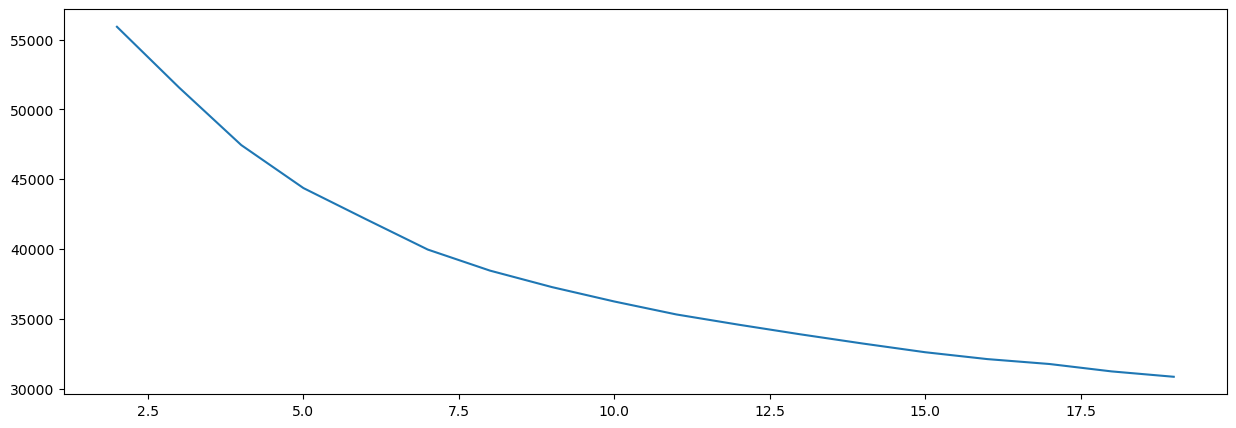

In [52]:
plt.figure(figsize = (15, 5))
plt.plot(K, inertia)
plt.show()

/Users/pedro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pedro/anacond

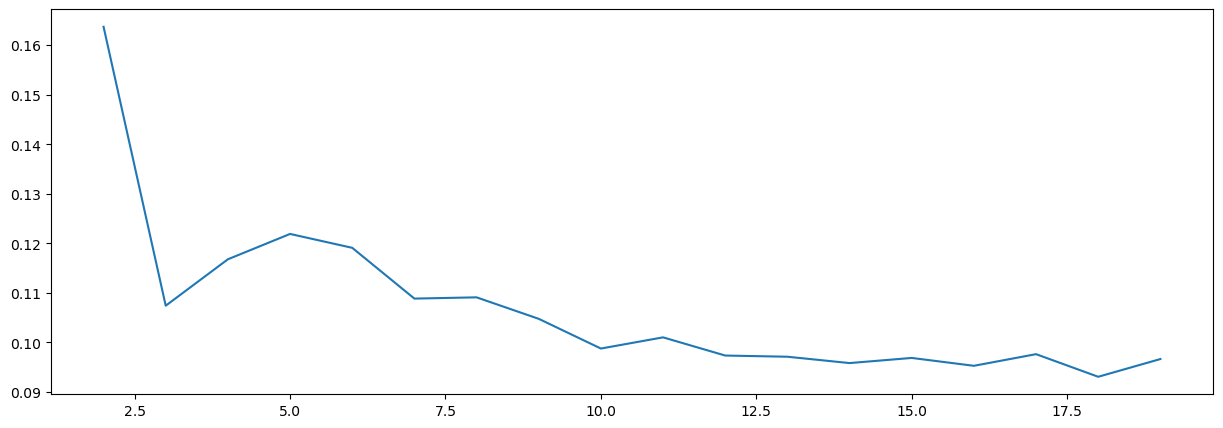

In [53]:
K = range(2,20)
silhouette = []

for k in K:
    kmeans = KMeans (n_clusters = k, random_state = 1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))
    
plt.figure(figsize = (15, 5))
plt.plot(K, silhouette)
plt.show()